# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [41]:
import pandas as pd

arquivo = 'data/Orange_Telecom_Churn_Data.csv'

df_telecom = pd.read_csv(arquivo)
df_telecom = df_telecom.drop(columns=["state", "area_code", "phone_number"])

## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [42]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']

#Binarizar colunas categoricas
lb = LabelBinarizer()

for i in range(0, len(bin_cols)):
    
    labels = df_telecom[bin_cols[i]]
    labels = list(set(labels))
    lb.fit(labels)
    df_telecom[bin_cols[i]] = lb.transform(df_telecom[bin_cols[i]])
    
#Escalonar dados
minMax = MinMaxScaler(feature_range = (0,1))
df_telecom = pd.DataFrame(minMax.fit_transform(df_telecom), columns= df_telecom.columns)

## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [43]:
x_cols = [x for x in df_telecom.columns if x != 'churned']

X_data = df_telecom[x_cols]
Y_data = df_telecom['churned']

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_data, Y_data)
yi = knn.predict(X_data)

## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [45]:
def accuracy(real, predict):
    
    predict = list(predict)
    real= list(real)
    acertos = 0
    
    for i in range(0, len(predict)):
        if predict[i] == real[i]:
            acertos +=1
    
    #Retorna a acurácia
    return (acertos/len(real))

print("A acurácia é de: ", accuracy(Y_data, yi))

A acurácia é de:  0.9422


## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [46]:
#Parte 1
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski', p=2)
knn.fit(X_data, Y_data)
yi = knn.predict(X_data)

print("Parte 1: A acuracia foi de ",accuracy(Y_data, yi))

#Parte 2
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski', p=1)
knn.fit(X_data, Y_data)
yi = knn.predict(X_data)

print("Parte 2: A acuracia foi de ",accuracy(Y_data, yi))

print("Isso ocorre porque com o parâmetro weights=distance os vizinhos mais próximos do ponto predito tem influência maior\nque vizinhos mais distantes pois usa-se o inverso da distancia")

Parte 1: A acuracia foi de  1.0
Parte 2: A acuracia foi de  0.9456
Isso ocorre porque com o parâmetro weights=distance os vizinhos mais próximos do ponto predito tem influência maior
que vizinhos mais distantes pois usa-se o inverso da distancia


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [47]:
score_list = list()

'''escreva no bloco abaixo'''

for i in range(1,21):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_data, Y_data)
    yi = knn.predict(X_data)
    acuracia = accuracy(Y_data, yi)
    score_list.append((i, acuracia))

'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [48]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

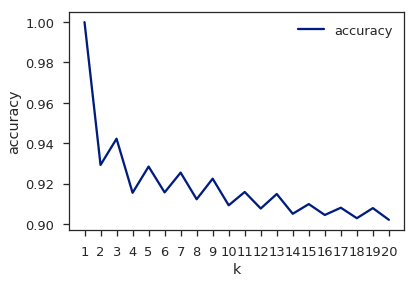

In [49]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

In [50]:
print("Para k=1 a acurácia é 1. Isso ocorre porque como estamos levando em consideração apenas um vizinho e estamos usando\na própria base de treinamento para fazer as predições o algoritmo vai determinar que a menor distância é entre o ponto\npredito e ele mesmo que é zero. Assim todos os pontos seriam classificados corretamente.")

Para k=1 a acurácia é 1. Isso ocorre porque como estamos levando em consideração apenas um vizinho e estamos usando
a própria base de treinamento para fazer as predições o algoritmo vai determinar que a menor distância é entre o ponto
predito e ele mesmo que é zero. Assim todos os pontos seriam classificados corretamente.
